In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# List of file paths
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY20.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2021.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2022april-june.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2022january-march.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2023 March April.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2023 May June.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2023 November December.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2023 january february.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2023 july august.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2023 september october.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 December.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 Feb.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 January.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 July august.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 October.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 September.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 august september.csv',
    '/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/3rd/FY2024 november.csv'
]

# Read each file and store in a list
dfs = [pd.read_csv(file) for file in file_paths]

# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

In [ ]:
# Now you have all the data in one DataFrame
data.head()

,DocumentId,HasFreePlans,HasFreeTrials,ProductDisplayName1,PublisherName,CustomerId,CPPAppId,TermDescription,ChannelName,TotalPriceBeforeTaxCDAmount,ServiceName,ActionName,StarRatingExternal,StarRatingMarketplace,NumberOfRatingsExternal,NumberOfRatingsMarketplace
0,EA00464038,True,False,Bitnami package for Mattermost Team Edition,Bitnami,4caf1bc5-45f4-4237-95a5-568d48e6646b,bitnami.mattermost,1 Compute Hour,Field-Led/EA,0.0,Virtual Machine Licenses,Consume,5.0,5.0,2,1
1,EA00464036,True,False,Bitnami package for Mattermost Team Edition,Bitnami,4caf1bc5-45f4-4237-95a5-568d48e6646b,bitnami.mattermost,1 Compute Hour,Field-Led/EA,0.0,Virtual Machine Licenses,Consume,5.0,5.0,2,1
2,EA00463919,True,False,Bitnami package for Mattermost Team Edition,Bitnami,4caf1bc5-45f4-4237-95a5-568d48e6646b,bitnami.mattermost,1 Compute Hour,Field-Led/EA,0.0,Virtual Machine Licenses,Consume,5.0,5.0,2,1
3,EA00489397,True,False,Bitnami package for Mattermost Team Edition,Bitnami,9036e28f-a683-4869-87bf-af4f117257e4,bitnami.mattermost,1 Compute Hour,Field-Led/EA,0.0,Virtual Machine Licenses,Consume,5.0,5.0,2,1
4,EA00489408,True,False,Bitnami package for Mattermost Team Edition,Bitnami,9036e28f-a683-4869-87bf-af4f117257e4,bitnami.mattermost,1 Compute Hour,Field-Led/EA,0.0,Virtual Machine Licenses,Consume,5.0,5.0,2,1


In [ ]:
# to show rows and columns of combined dataframe
data.shape

(5102320, 16)

In [ ]:
# To find out missing values in my data
data.isna().sum()

DocumentId                           0
HasFreePlans                         0
HasFreeTrials                        0
ProductDisplayName1                  0
PublisherName                        0
CustomerId                           0
CPPAppId                             0
TermDescription                      8
ChannelName                      55310
TotalPriceBeforeTaxCDAmount          0
ServiceName                          0
ActionName                           0
StarRatingExternal             1119082
StarRatingMarketplace          1526695
NumberOfRatingsExternal              0
NumberOfRatingsMarketplace           0
dtype: int64

In [ ]:
# To check duplicated rows
duplicated_rows=data[data.duplicated()]
duplicated_rows.shape[0]

495260



---



---



In [ ]:
# Create a new column 'ConvertedCustomer' based on 'TotalPriceBeforeTaxCDAmount'
data['ConvertedCustomer'] = data['TotalPriceBeforeTaxCDAmount'].apply(lambda x: 1 if x > 0 else 0)

# Check the first few rows to verify the new column
data.sample(5)

,DocumentId,HasFreePlans,HasFreeTrials,ProductDisplayName1,PublisherName,CustomerId,CPPAppId,TermDescription,ChannelName,TotalPriceBeforeTaxCDAmount,ServiceName,ActionName,StarRatingExternal,StarRatingMarketplace,NumberOfRatingsExternal,NumberOfRatingsMarketplace,ConvertedCustomer
1498488,G021627677,True,False,Bitnami package for Joomla!,Bitnami,27479ae8-d183-5ceb-a5b6-6c19f80b5436,bitnami.joomla,1 Compute Hour,Direct,0.00,Virtual Machine Licenses,Consume,NaN,NaN,0,0,0
386300,EA00496831,True,True,Fortinet FortiGate Next-Generation Firewall (VM),Fortinet,6a3bcad2-9fc7-4160-8d8f-4ea1ca9f8776,fortinet.fortinet_fortigate-vm_v5,1 Compute Hour,Field-Led/EA,0.00,Virtual Machine Licenses,Consume,4.841951,4.841951,164,164,0
2215986,EA01635526,True,False,Secure Your Cloud with Golden Hardened Image,Cognosys Inc.,25f7d9cc-1fbe-45d8-a21d-78f923441e5e,cognosys.centos-8-1,1 Compute Hour,Field-Led/EA,0.00,Virtual Machine Licenses,Consume,NaN,NaN,0,0,0
4010755,G025827961,True,False,Twilio SendGrid,SendGrid,ac242d25-4e3d-4576-95cc-a75ac9afca29,sendgrid.tsg-saas-offer,1 Month Subscription,Direct,17.95,SaaS,Renew,4.028609,4.158799,1311,1251,1
2571804,G019569165,True,False,Twilio SendGrid,SendGrid,591e9276-eb61-533a-9ad7-c288e31ae7b7,sendgrid.tsg-saas-offer,1 Month Subscription,Direct,0.00,SaaS,Renew,4.028609,4.158799,1311,1251,0


In [ ]:
# Group by 'ProductDisplayName1' and count unique customers
total_customers = data.groupby('ProductDisplayName1')['CustomerId'].nunique()

# Filter data for converted customers (TotalPriceBeforeTaxCDAmount > 0)
converted_customers = data[data['TotalPriceBeforeTaxCDAmount'] > 0]

# Group by 'ProductDisplayName1' and count unique converted customers
converted_counts = converted_customers.groupby('ProductDisplayName1')['CustomerId'].nunique()

# Calculate conversion rate (converted customers / total customers)
conversion_rates = (converted_counts / total_customers).fillna(0)

# Sort by conversion rate in descending order and get top 10
top_10_conversion_rates = conversion_rates.sort_values(ascending=False).head(10)

# Display the top 10 products with highest conversion rates
display(top_10_conversion_rates)

ProductDisplayName1
NVIDIA Riva                                                    1.0
Revamp Your Web Presence with Joomla on Centos 8.              1.0
Rencore Governance QA v1                                       1.0
DataSunrise Data & Database Security monthly/annual billing    1.0
DataSunrise Data & Database Security                           1.0
Reprint AI                                                     1.0
DataRobot AI Platform for Microsoft Azure                      1.0
DataOS® The Data Product Platform                              1.0
DataMasque Data Masking - Ubuntu                               1.0
DataMapper Test                                                1.0
Name: CustomerId, dtype: float64

In [ ]:
# Calculate maximum conversion rate
max_conversion_rate = conversion_rates.max()

# Count the number of products with the maximum conversion rate
num_products_with_max_conversion_rate = (conversion_rates == max_conversion_rate).sum()

# Print the result
print("Number of products with maximum conversion rate:", num_products_with_max_conversion_rate)

Number of products with maximum conversion rate: 1044


- We are not able to perform any analysis on HasFreePlans because it has only one unique value which is "TRUE" means all products have free plans.

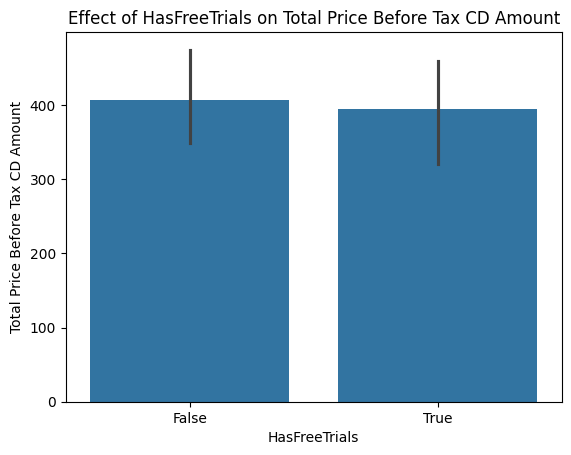

In [ ]:
# Create a bar plot
sns.barplot(x='HasFreeTrials', y='TotalPriceBeforeTaxCDAmount', data=data)
plt.xlabel('HasFreeTrials')
plt.ylabel('Total Price Before Tax CD Amount')
plt.title('Effect of HasFreeTrials on Total Price Before Tax CD Amount')
plt.show()

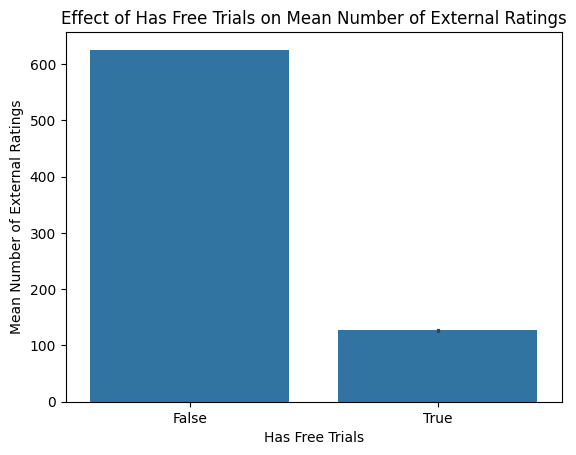

In [ ]:
# Create a bar plot with mean strategy
sns.barplot(x='HasFreeTrials', y='NumberOfRatingsExternal', data=data)
plt.xlabel('Has Free Trials')
plt.ylabel('Mean Number of External Ratings')
plt.title('Effect of Has Free Trials on Mean Number of External Ratings')
plt.show()

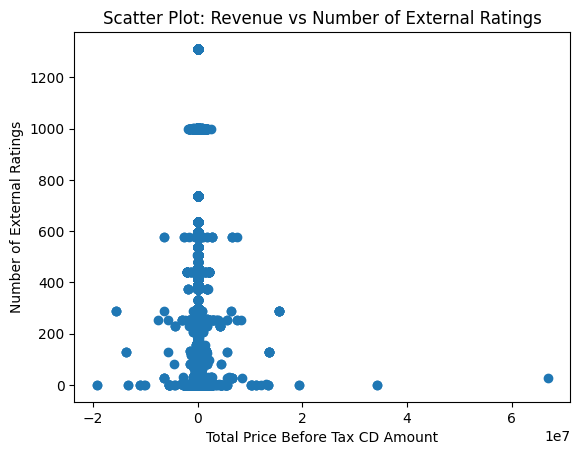

In [ ]:
# Create scatter plot
plt.scatter(data['TotalPriceBeforeTaxCDAmount'], data['NumberOfRatingsExternal'])
plt.xlabel('Total Price Before Tax CD Amount')
plt.ylabel('Number of External Ratings')
plt.title('Scatter Plot: Revenue vs Number of External Ratings')
plt.show()

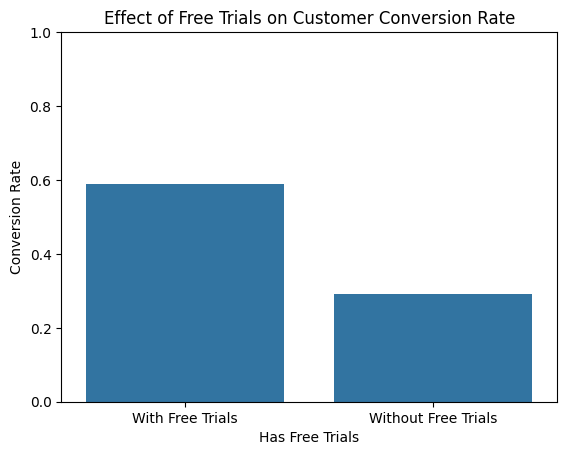

In [ ]:
# Calculate conversion rate for products with free trials
conversion_rate_with_trials = data[data['HasFreeTrials'] == True]['ConvertedCustomer'].mean()

# Calculate conversion rate for products without free trials
conversion_rate_without_trials = data[data['HasFreeTrials'] == False]['ConvertedCustomer'].mean()

# Create a bar plot
sns.barplot(x=['With Free Trials', 'Without Free Trials'], y=[conversion_rate_with_trials, conversion_rate_without_trials])
plt.xlabel('Has Free Trials')
plt.ylabel('Conversion Rate')
plt.title('Effect of Free Trials on Customer Conversion Rate')
plt.ylim(0, 1)  # Set y-axis limits to show conversion rate from 0 to 1
plt.show()

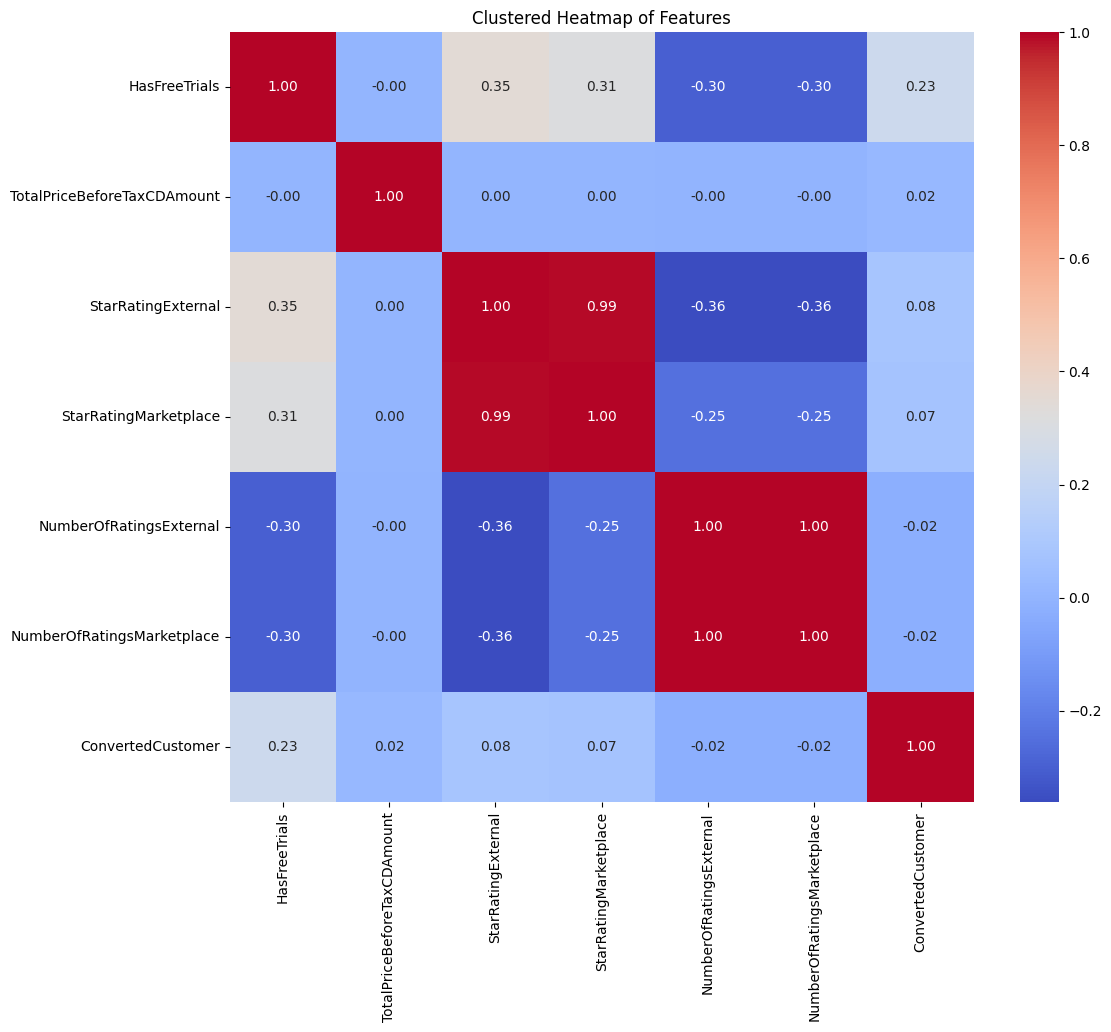

In [ ]:
# Selecting relevant columns for heatmap
heatmap_data = data[['HasFreeTrials', 'TotalPriceBeforeTaxCDAmount',
                     'StarRatingExternal', 'StarRatingMarketplace',
                     'NumberOfRatingsExternal', 'NumberOfRatingsMarketplace',
                     'ConvertedCustomer']]

# Calculating correlation matrix
correlation_matrix = heatmap_data.corr()

# Creating clustered heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Clustered Heatmap of Features')
plt.show()

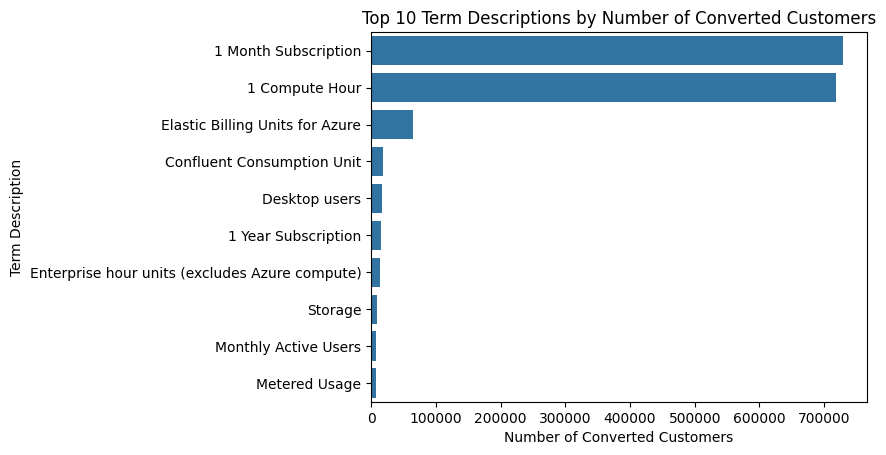

In [ ]:
# Grouping data by TermDescription and summing the ConvertedCustomer column
term_description_conversion = data.groupby('TermDescription')['ConvertedCustomer'].sum().reset_index()

# Sorting the data by the number of converted customers
term_description_conversion = term_description_conversion.sort_values(by='ConvertedCustomer', ascending=False)

# Creating a bar plot
sns.barplot(x='ConvertedCustomer', y='TermDescription', data=term_description_conversion.head(10))
plt.xlabel('Number of Converted Customers')
plt.ylabel('Term Description')
plt.title('Top 10 Term Descriptions by Number of Converted Customers')
plt.show()

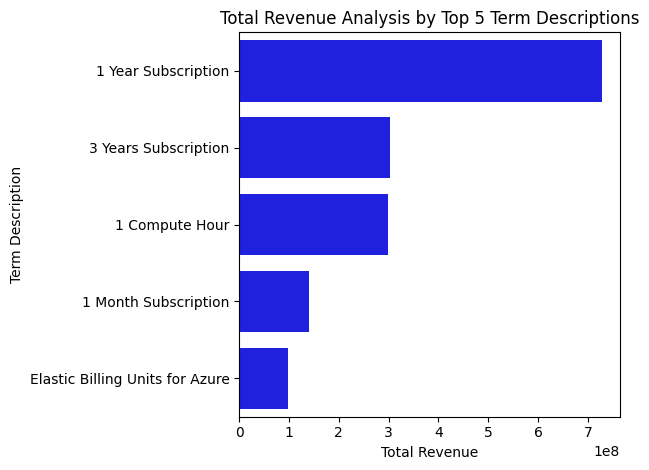

In [ ]:
# Grouping data by TermDescription and summing the TotalPriceBeforeTaxCDAmount column
term_description_data = data.groupby('TermDescription')['TotalPriceBeforeTaxCDAmount'].sum().reset_index()

# Sorting the data by the total revenue
term_description_data = term_description_data.sort_values(by='TotalPriceBeforeTaxCDAmount', ascending=False).head(5)

# Create a bar plot
sns.barplot(x='TotalPriceBeforeTaxCDAmount', y='TermDescription', data=term_description_data, color='blue')

# Set labels and title
plt.xlabel('Total Revenue')
plt.ylabel('Term Description')
plt.title('Total Revenue Analysis by Top 5 Term Descriptions')

# Show plot
plt.tight_layout()
plt.show()